**NAME:** Himanshu Ravindra Katrojwar

**UGMR ID:** UGMR20230002


# **Fundamentals of Deep Learning**

Deep learning is a subset of machine learning, which itself is a subset of artificial intelligence (AI). It involves training artificial neural networks to learn and make decisions from large amounts of data. Deep learning is a subset of machine learning that focuses on neural networks with multiple layers. These networks are inspired by the structure and function of the human brain, where signals propagate through layers of interconnected nodes or "neurons." Each layer processes and transforms the input data, allowing the network to learn and represent increasingly complex patterns and features.

### **1. Bias**

Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

Bias(Y)=E(Y)-Y

*where,
Y = true value,
E(Y)= expected value*

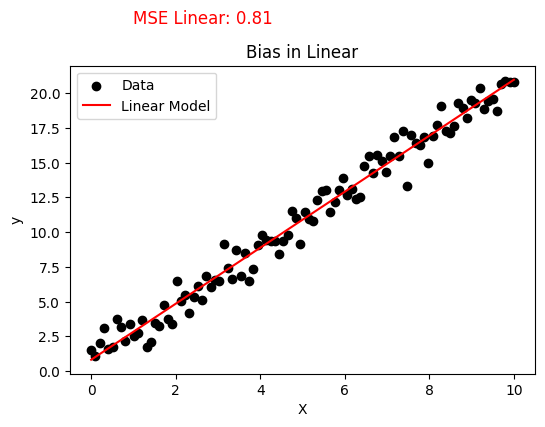

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1)  # Generate target variable y

# Train linear model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Plot results
plt.figure(figsize=(6, 4))

# Plot original data
plt.scatter(X, y, color='black', label='Data')

# Plot linear model predictions
plt.plot(X, y_pred_linear, color='red', label='Linear Model')

# Calculate and display mean squared error
mse_linear = mean_squared_error(y, y_pred_linear)
plt.text(1, 25, f'MSE Linear: {mse_linear:.2f}', fontsize=12, color='red')

plt.title('Bias in Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### **2. Variance**

Variance is a way to understand how spread out the data is around its mean. In the context of machine learning, it refers to how much the performance of a predictive model can change when we train it on different portions of the training data. Essentially, it's about how sensitive the model is to variations in the data it learns from. If a model has high variance, it means it's very adaptable and can fit closely to different subsets of data, but that can also make it prone to overfitting, where it performs well on training data but poorly on new, unseen data.

Variance =E[(Y-E[Y])^2]

*where E(Y) = expected value*

Train Variance: 0.09
Test Variance: 0.82


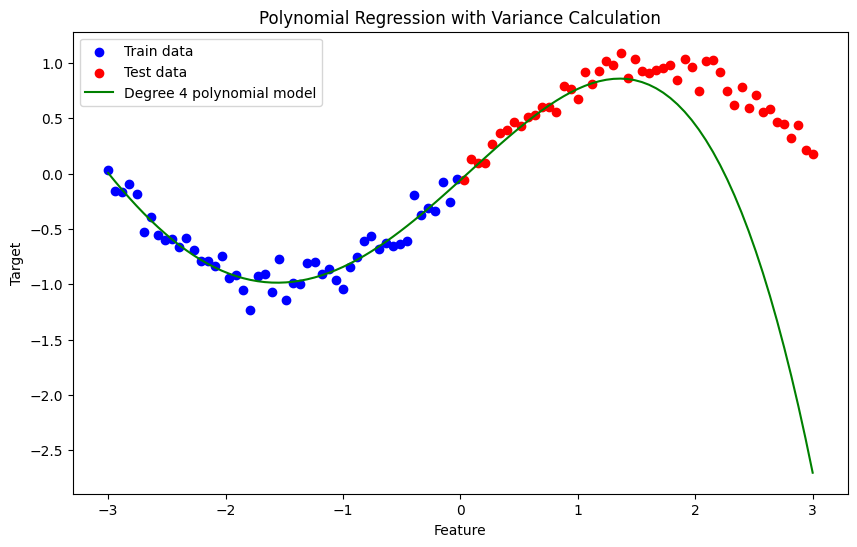

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # True relationship + noise

# Split the data into training and test sets
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

# Transform the data to include polynomial features
degree = 4
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on training set
y_pred_train = model.predict(X_poly_train)
y_pred_train_torch = torch.tensor(y_pred_train, dtype=torch.float32)

# Predict on test set
y_pred_test = model.predict(X_poly_test)
y_pred_test_torch = torch.tensor(y_pred_test, dtype=torch.float32)

# Calculate variance of the predictions
variance_train = torch.var(y_pred_train_torch, unbiased=False)
variance_test = torch.var(y_pred_test_torch, unbiased=False)

print(f'Train Variance: {variance_train.item():.2f}')
print(f'Test Variance: {variance_test.item():.2f}')

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')

# Plot the polynomial regression line
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='green', label=f'Degree {degree} polynomial model')

plt.title('Polynomial Regression with Variance Calculation')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


### **3. MLP (Multi-Layer Perceptron)**

The MLP, or Multi-Layer Perceptron, is a feedforward neural network consisting of fully connected neurons with a nonlinear kind of activation function. It is widely used to distinguish data that is not linearly separable. MLPs are trained using supervised learning and are commonly used for tasks such as classification, regression, and function approximation. They have the ability to learn complex patterns and relationships in data, making them a popular choice for a wide range of applications, including image recognition, natural language processing, and speech recognition, among others


	**Components**

•	Input Layer: It consists of nodes or neurons that receive the initial input data.

•	Hidden Layers: Perform transformations on the input data.

•	Output Layer: This layer consists of neurons that produce the final output of the network.

•	Weights: Each connection has an associated weight, which determines the strength of the connection. These weights are learned during the training process.

•	Bias: Bias shifts the activation function of the neurons in the subsequent layer, allowing the network to learn an offset or bias in the decision boundary.

•	Activation Function: These functions introduce nonlinearity into the network, allowing it to learn complex patterns in the data.



	**Working**

• The input node represents the feature of the dataset.

• Each input node passes the vector input value to the hidden layer.

• In the hidden layer, each edge has some weight multiplied by the input variable. All the production values from the hidden nodes are summed together. To generate the output

• The activation function is used in the hidden layer to identify the active nodes.

• The output is passed to the output layer.

• Calculate the difference between predicted and actual output at the output layer.

• The model uses backpropagation after calculating the predicted output.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(2, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    test_outputs = model(X_test_tensor)

    _, train_predicted = torch.max(train_outputs, 1)
    _, test_predicted = torch.max(test_outputs, 1)

    train_accuracy = accuracy_score(y_train_tensor.numpy(), train_predicted.numpy())
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predicted.numpy())

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Epoch [100/1000], Loss: 0.5245
Epoch [200/1000], Loss: 0.3467
Epoch [300/1000], Loss: 0.3211
Epoch [400/1000], Loss: 0.3103
Epoch [500/1000], Loss: 0.3053
Epoch [600/1000], Loss: 0.3039
Epoch [700/1000], Loss: 0.3028
Epoch [800/1000], Loss: 0.3022
Epoch [900/1000], Loss: 0.3019
Epoch [1000/1000], Loss: 0.3015
Training Accuracy: 0.88
Test Accuracy: 0.83


### **4. Deep neural network (DNN)**

DNN is type of ANN that contain multiple hidden layers between the input and output layer. It can model complex non-linear relationship. The main purpose of it is to receive a set of inputs that perform complex calculations on them, and give output to solve real world problems like classification.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Setup and Load Data
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# 2. Define the DNN Model
class SimpleDNN(nn.Module):
    def __init__(self):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(256, 128)    # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(128, 10)     # Second hidden layer to output layer
        self.relu = nn.ReLU()             # ReLU activation function
        self.softmax = nn.LogSoftmax(dim=1) # LogSoftmax activation for the output layer

    def forward(self, x):
        x = x.view(-1, 28*28)    # Flatten the input image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Instantiate the model, define the loss function and the optimizer
model = SimpleDNN()
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training the Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")

# 4. Evaluating the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 25881971.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1622063.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10001346.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7456175.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.3541
Epoch [2/5], Loss: 0.1620
Epoch [3/5], Loss: 0.1154
Epoch [4/5], Loss: 0.0905
Epoch [5/5], Loss: 0.0758
Accuracy of the model on the 10,000 test images: 96.48%


### **5.	Back Propagation**



Backpropagation is the algorithm used for training neural networks, involving the propagation of the error back through the network to update the weights.

	Steps

1.	Forward Pass: The input data is fed into the network, and it produces an output using current weights.
2.	Loss Calculation: The output is compared to the true target (the actual answer) using a loss function to measure the error.
3.	Backward Pass: The algorithm calculates the gradient (derivative) of the loss with respect to each weight by applying the chain rule of calculus. This helps identify how much each weight contributed to the error.
4.	Weight Update: The weights are adjusted in the opposite direction of the gradient to minimize the loss, typically using an optimization algorithm like Stochastic Gradient Descent.


### **6. Loss Function**



A loss function, also known as a cost function or objective function. It is a mathematical function that measures the difference between the predicted output of a neural network and the actual target values. It quantifies how well or poorly the model is performing, guiding the learning process by providing feedback that the network uses to adjust its weights.

### **7. Activation Function**

Activation Functions introduce non-linearity into the network, allowing it to learn complex patterns. Without non-linearity, a neural network would essentially behave like a linear regression model, regardless of the number of layers it has.

#### **Types of Activation Functions**
1. Sigmoid Function

  Formula: σ(x)=1/1+e^-x

  Range: Outputs range between 0 and 1.

  Usage: Historically used in binary classification tasks.


2. Hyperbolic Tangent (tanh) Activation Function

 Formula: Tanh(x)=e^x-e^-x/e^x+e^-x

 Range: Outputs range between -1 and 1.

 Usage: Often used in hidden layers of neural networks.


3. Rectified Linear Unit (ReLU) Activation Function

 Formula: ReLU(x)=max(0,x)

 Range: Outputs 0 for negative inputs and linearly scales positive inputs.

 Usage: Most commonly used activation function in hidden layers due to its simplicity and effectiveness.

4. Leaky ReLU Activation Function

  Formula: Leaky ReLU(x)={ x    if x>=0
  ax if x< 0

 Range: Outputs a small non-zero gradient for negative inputs.

 Usage: Addresses the "dying ReLU" problem where neurons may become inactive for negative inputs.

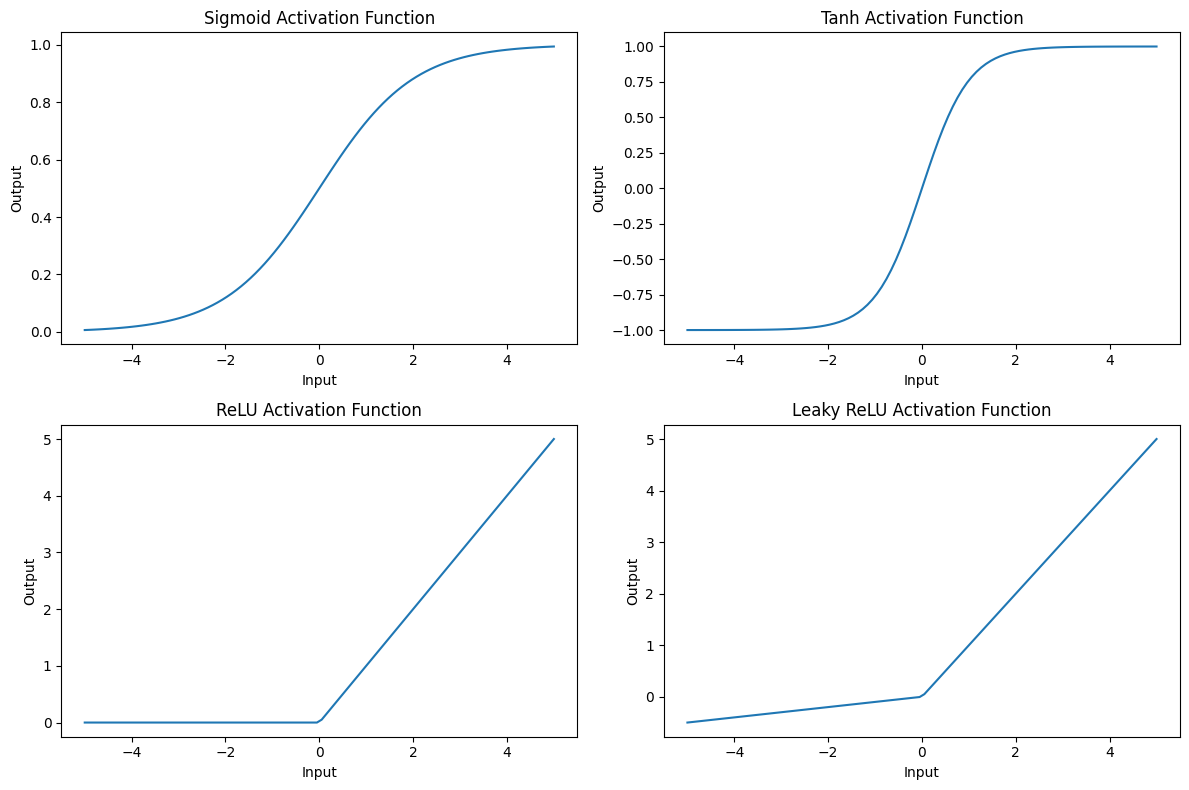

In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Define the input range
x = torch.linspace(-5, 5, 100)

# Sigmoid activation function
sigmoid = torch.sigmoid(x).numpy()

# Tanh activation function
tanh = torch.tanh(x).numpy()

# ReLU activation function
relu = F.relu(x).numpy()

# Leaky ReLU activation function (with negative slope of 0.1)
leaky_relu = F.leaky_relu(x, negative_slope=0.1).numpy()

# Plotting the activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Sigmoid Activation Function')
plt.plot(x.numpy(), sigmoid)
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 2, 2)
plt.title('Tanh Activation Function')
plt.plot(x.numpy(), tanh)
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 2, 3)
plt.title('ReLU Activation Function')
plt.plot(x.numpy(), relu)
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 2, 4)
plt.title('Leaky ReLU Activation Function')
plt.plot(x.numpy(), leaky_relu)
plt.xlabel('Input')
plt.ylabel('Output')

plt.tight_layout()
plt.show()

### **8. Regularization**

#### Regularization

Regularization is techniques which is use to prevent overfitting, which occurs when a model learns to perform very well on the training data but fails on unseen data.

This technique helps to maintain all variables or features in the model by reducing the magnitude of the variables. Hence, it maintains accuracy as well as a generalize the model.

Common regularization is techniques
1.	Ridge regularization -
Type of regularization in which a small amount of bias is introduced to get better long-term predictions. The amount of bias added to the model is called Ridge Regression penalty. It helps to reduce the complexity of model so also called as L2 regularization.

   Loss=Original Loss+λ∑wi^2    
   
      λ is a hyperparameter that controls the regularization






In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()

# Define the optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  # weight_decay parameter adds L2 regularization

# Example input and target tensors
inputs = torch.randn(64, 10)  # Batch of 64, 10 features each
targets = torch.randn(64, 1)  # Batch of 64, 1 target each

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.9156646728515625
Epoch 10, Loss: 0.8693392872810364
Epoch 20, Loss: 0.8348128199577332
Epoch 30, Loss: 0.8075717091560364
Epoch 40, Loss: 0.7853378653526306
Epoch 50, Loss: 0.7666946053504944
Epoch 60, Loss: 0.75071120262146
Epoch 70, Loss: 0.7367434501647949
Epoch 80, Loss: 0.7242763042449951
Epoch 90, Loss: 0.7129316329956055


2.	Lasso Regularization-
Type of regularization technique which uses the L1 regularization so it is  called as LASSO(Least Absolute Shrinkage and Selection Operator) that helps to reduce the complexity ,overfitting and feature selection.
in the model.
        
        Loss=Original Loss+λ∑∣wi∣

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define the L1 regularization strength
l1_lambda = 0.01

# Example input and target tensors
inputs = torch.randn(64, 10)  # Batch of 64, 10 features each
targets = torch.randn(64, 1)  # Batch of 64, 1 target each

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Add L1 regularization
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    loss = loss + l1_lambda * l1_norm

    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')



Epoch 0, Loss: 2.082258462905884
Epoch 10, Loss: 2.016418933868408
Epoch 20, Loss: 1.9790540933609009
Epoch 30, Loss: 1.9498541355133057
Epoch 40, Loss: 1.924655795097351
Epoch 50, Loss: 1.9023572206497192
Epoch 60, Loss: 1.8821775913238525
Epoch 70, Loss: 1.8641550540924072
Epoch 80, Loss: 1.8474231958389282
Epoch 90, Loss: 1.8315657377243042


### **9. CNN**

CNN is a type of deep learning algorithm that helps in image classification and image recognition in neural networks. The architecture of CNNs is inspired by the visual processing in the human brain, and they are well-suited for capturing hierarchical patterns and spatial dependencies within images.

**Components:**
1.	Convolutional Layers: This layers uses different convolutional operations to understand input images by using filters (also known as kernels) to detect features such as edges, textures, and more complex patterns.
2.	Pooling Layers: Pooling layer performs downsampling operations to reduce the spatial dimensions of the feature maps. Max pooling is a common pooling operation for selecting the maximum value from a group of neighboring pixels.
3.	Activation Functions: It introduces non-linear activation functions learn complex patterns in data.
4.	Flattening: The resulting feature maps are flattened into a one-dimensional vector after the convolution and pooling layers so they can be passed into a completely linked layer for categorization or regression.

5.	Fully Connected Layers: They are responsible for making predictions based on the high-level features learned by the previous layers. They connect every neuron in one layer to every neuron in the next layer.


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define transforms for the training data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Epoch 1, Loss: 0.21172365196831605
Epoch 2, Loss: 0.05658158959251449
Epoch 3, Loss: 0.04053802193081163
Epoch 4, Loss: 0.0317590001556374
Epoch 5, Loss: 0.024686988609971285
Accuracy: 98.77%


### **10. Recurrent Neural Network (RNN)**

Recurrent neural network (RNN) is a type of artificial neural network use for speech recognition and natural language processing to recognize patterns, text, handwriting, the spoken word, and numerical time series data. In RNN the all the inputs and outputs are independent of each other and output from previous step is fed as input to the current step.

The main and most important feature of RNN is its Hidden state. It acts as a memory that captures information from previous time steps. In each step, the hidden state is updated based on the current input and the previous hidden state.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple RNN
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Example input and target tensors
# Batch size = 3, Sequence length = 5, Input size = 1
inputs = torch.tensor([[[1.0], [2.0], [3.0], [4.0], [5.0]],
                       [[2.0], [3.0], [4.0], [5.0], [6.0]],
                       [[3.0], [4.0], [5.0], [6.0], [7.0]]])

targets = torch.tensor([[6.0], [7.0], [8.0]])

# Initialize the model, loss function, and optimizer
model = SimpleRNN(input_size=1, hidden_size=10, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Testing the model
model.eval()
with torch.no_grad():
    test_input = torch.tensor([[[4.0], [5.0], [6.0], [7.0], [8.0]]])
    test_output = model(test_input)
    print(f'Predicted output: {test_output.item()}')


Epoch 10, Loss: 31.580114364624023
Epoch 20, Loss: 19.544025421142578
Epoch 30, Loss: 11.827631950378418
Epoch 40, Loss: 6.50810432434082
Epoch 50, Loss: 3.3269269466400146
Epoch 60, Loss: 1.6924101114273071
Epoch 70, Loss: 0.9842602610588074
Epoch 80, Loss: 0.7361770272254944
Epoch 90, Loss: 0.6721795201301575
Epoch 100, Loss: 0.6632576584815979
Predicted output: 7.003402233123779


### **11. Transformers**

Before transformer RNN architecture was used to tackle almost all NLP problems but due to the certain drawbacks of it like RNN networks do not operate well in long words, and training time is too sluggish since the model must walk through sentences step by step. So therefore Transformers were created to address such issues. Transformer architecture may be thought of as an architecture in which the attention mechanism is applied to the whole encoder and decoder.

In [11]:
import torch
import torch.nn as nn

# Simplified Multi-Head Attention
class SimpleMultiHeadAttention(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleMultiHeadAttention, self).__init__()
        self.attention = nn.MultiheadAttention(d_model, nhead)

    def forward(self, query, key, value):
        query, key, value = query.permute(1, 0, 2), key.permute(1, 0, 2), value.permute(1, 0, 2)
        attn_output, _ = self.attention(query, key, value)
        return attn_output.permute(1, 0, 2)

# Simplified Transformer Encoder Layer
class SimpleTransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleTransformerEncoderLayer, self).__init__()
        self.self_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.layer_norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Self-Attention
        attn_output = self.self_attention(x, x, x)
        x = self.layer_norm1(x + self.dropout(attn_output))
        # Feed Forward
        ff_output = self.feed_forward(x)
        x = self.layer_norm2(x + self.dropout(ff_output))
        return x

# Simplified Transformer Decoder Layer
class SimpleTransformerDecoderLayer(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleTransformerDecoderLayer, self).__init__()
        self.self_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.encoder_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.layer_norm2 = nn.LayerNorm(d_model)
        self.layer_norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, tgt, memory):
        # Self-Attention
        self_attn_output = self.self_attention(tgt, tgt, tgt)
        tgt = self.layer_norm1(tgt + self.dropout(self_attn_output))
        # Encoder-Decoder Attention
        enc_dec_attn_output = self.encoder_attention(tgt, memory, memory)
        tgt = self.layer_norm2(tgt + self.dropout(enc_dec_attn_output))
        # Feed Forward
        ff_output = self.feed_forward(tgt)
        tgt = self.layer_norm3(tgt + self.dropout(ff_output))
        return tgt

# Complete Simplified Transformer Model
class SimpleTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_encoder_layers, num_decoder_layers):
        super(SimpleTransformer, self).__init__()
        self.encoder_layers = nn.ModuleList([
            SimpleTransformerEncoderLayer(d_model, nhead) for _ in range(num_encoder_layers)
        ])
        self.decoder_layers = nn.ModuleList([
            SimpleTransformerDecoderLayer(d_model, nhead) for _ in range(num_decoder_layers)
        ])
        self.fc_out = nn.Linear(d_model, 1)  # Output layer (e.g., for regression tasks)

    def forward(self, src, tgt):
        memory = src
        for layer in self.encoder_layers:
            memory = layer(memory)
        output = tgt
        for layer in self.decoder_layers:
            output = layer(output, memory)
        output = self.fc_out(output)
        return output

# Example usage
if __name__ == "__main__":
    d_model = 64
    nhead = 4
    num_encoder_layers = 2
    num_decoder_layers = 2

    model = SimpleTransformer(d_model, nhead, num_encoder_layers, num_decoder_layers)

    # Dummy input (sequence length=10, batch size=32, feature size=64)
    src = torch.randn(32, 10, d_model)  # Source sequence
    tgt = torch.randn(32, 10, d_model)  # Target sequence
    output = model(src, tgt)
    print(output.shape)

torch.Size([32, 10, 1])
